## Part 2: Visual Analysis

In this section, I will go over some visualizations of the data and deliver input.

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set() #loads color palette for seaborn
np.random.seed(123) #ensures that random example is consistent every time

spotify = pd.read_csv('/Users/jarek/Spotify project/SpotifyAnalysis.csv')
spotify = spotify[spotify['popularity'] >= 70]
spotify = spotify.drop(spotify.columns[0], axis = 1)
s_sample = spotify.sample(1000)
s_sample.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19706,23T0OX7QOiIUFShSzbJ5Uo,Gabby Barrett,Goldmine,I Hope,74,210772,False,0.466,0.536,6,-6.227,1,0.0429,0.0951,0.000000,0.1140,0.377,75.998,4,country
51021,0a6zRnrjmaOcqsEIFkXIhw,Akhil,Khaab,Khaab,72,201689,False,0.662,0.661,0,-5.689,1,0.0514,0.4170,0.000000,0.0784,0.222,80.009,4,hip-hop
2369,5f2zZawBtGBEw24ABweErz,Bea Miller;Arcane;League of Legends,Playground (from the series Arcane League of L...,Playground (from the series Arcane League of L...,70,230525,False,0.514,0.703,8,-6.859,1,0.0298,0.0107,0.000076,0.1300,0.356,157.399,4,alt-rock
65023,6TQS7URegxmcb8tTNpoXzi,Dhanush;Anirudh Ravichander,"Megham Karukatha (From ""Thiruchitrambalam"")","Megham Karukatha (From ""Thiruchitrambalam"")",80,290400,False,0.429,0.614,4,-6.573,0,0.0709,0.5130,0.000316,0.0922,0.743,149.966,3,k-pop
99022,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",76,228855,False,0.603,0.573,1,-5.843,1,0.0502,0.4780,0.000000,0.0971,0.236,82.941,4,singer-songwriter


This code establishes the libraries necessary to create visualizations, as well as imports the CSV dataset. For my first approach, I opted for a random sample of 1000 songs at or above a popularity score of 70. I also dropped a nameless column that had include itself in the dataset.

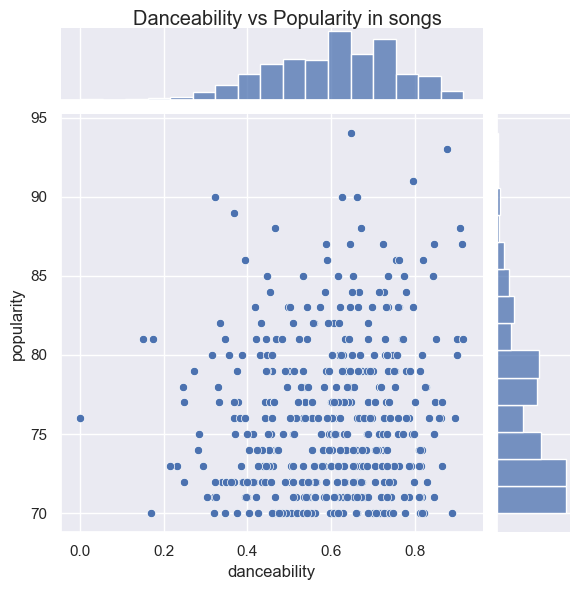

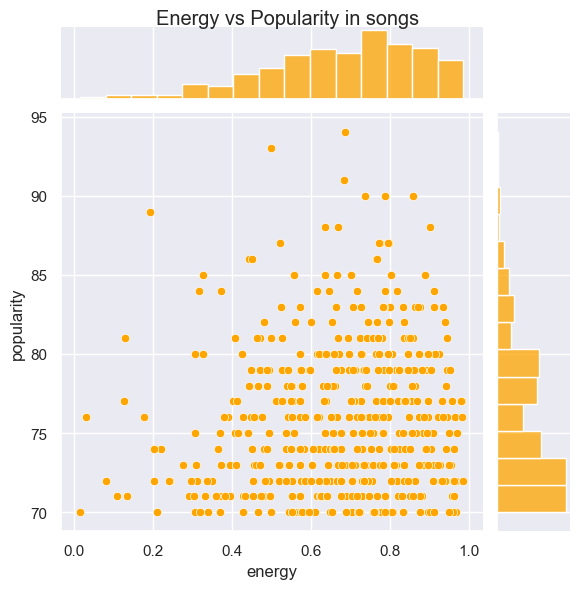

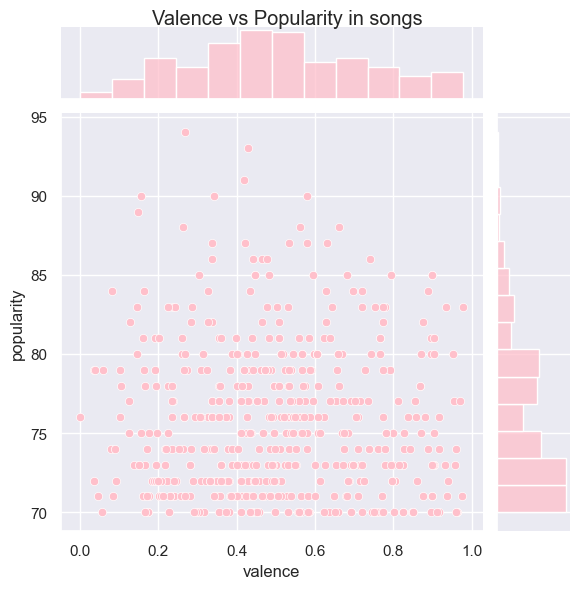

In [61]:
sns.jointplot(data=s_sample, x="danceability", y="popularity", kind='scatter')
plt.suptitle("Danceability vs Popularity in songs")
plt.subplots_adjust(top=0.95)

sns.jointplot(data=s_sample, x="energy", y="popularity", kind='scatter', color='orange')
plt.suptitle("Energy vs Popularity in songs")
plt.subplots_adjust(top=0.95)

sns.jointplot(data=s_sample, x="valence", y="popularity", kind='scatter', color='pink')
plt.suptitle("Valence vs Popularity in songs")
plt.subplots_adjust(top=0.95)

For this visualization, I did a joint scatterplot histogram relating a song's danceability score onto its popularity. Immediately, one can identify the potential normal distribution of danceable songs within the sample peaking in the .6-.7 range. This supports the notion that an essential component of popular songs is above average danceability. The same just about holds the same for energy, with more favorable songs being above average in energy. Valence, however, seems to not hold any impact when it comes to song popularity, with a generally  I was hoping to find a trend within the distribution of popularity, but was disappointed to find that, reasonably, the majority of the songs within the sample laid near the bottom of the range. Because of this, I decided to revise my apporach.

In [52]:
pop_tier_3 = (spotify['popularity'] >= 70) & (spotify['popularity'] < 80)
pop_tier_2 = (spotify['popularity'] >= 80) & (spotify['popularity'] < 90)
pop_tier_1 = (spotify['popularity'] >= 90)

tier_3 = spotify[pop_tier_3]
tier_2 = spotify[pop_tier_2]
tier_1 = spotify[pop_tier_1]

print(len(tier_1),len(tier_2), len(tier_3))

98 1103 4271


I organized the data into tiers of popularity, with tier one being the most popular songs with a 90 or above ranking, tier two being the high end of the 80's and tier one being the remaining low end. In order to maintain comparability, I took a sample of tier 2 and 3 songs akin to the size of tier 1.

In [72]:
tier_2_sample = tier_2.sample(98)
tier_3_sample = tier_3.sample(98)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alt-rock
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative
15013,3JvKfv6T31zO0ini8iNItO,Tom Odell,Long Way Down (Deluxe),Another Love,93,244360,True,0.445,0.537,4,-8.532,0,0.0400,0.6950,0.000017,0.0944,0.1310,122.769,4,chill
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.0635,0.000001,0.1050,0.3100,116.992,4,dance
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.2380,131.121,4,dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104801,2mRwodUOATBk5spcUsEidB,Rels B,LA ISLA LP,La Última Canción,73,184748,False,0.793,0.605,1,-4.952,0,0.1190,0.4260,0.000000,0.3340,0.2680,91.068,4,spanish
53533,2pPO9YecZimmuVQfIzfV6U,Ofenbach;Lagique,Wasted Love (feat. Lagique),Wasted Love (feat. Lagique),75,139563,False,0.734,0.855,6,-4.578,0,0.1350,0.0821,0.000005,0.0901,0.5400,121.955,4,house
20308,0YammaEkYSeo9vQYZ1OwS6,David Guetta;Bebe Rexha;J Balvin,7,Say My Name,73,198946,False,0.703,0.660,10,-5.119,0,0.1230,0.1370,0.000000,0.1920,0.7900,95.031,4,dance
71213,0RdUX4WE0fO30VnlUbDVL6,Scorpions,Comeblack,Still Loving You,74,403453,False,0.282,0.605,6,-4.916,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,4,metal


([<matplotlib.axis.YTick at 0x7f9b7626be50>,
 [Text(0, 70, '70'),
  Text(0, 72, '72'),
  Text(0, 74, '74'),
  Text(0, 76, '76'),
  Text(0, 78, '78')])

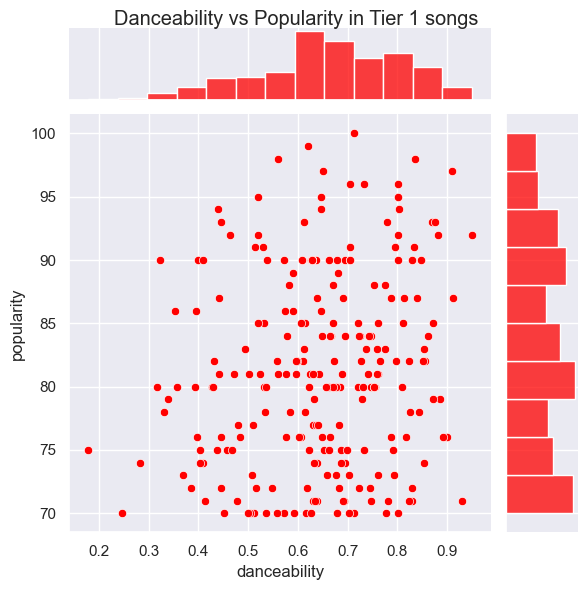

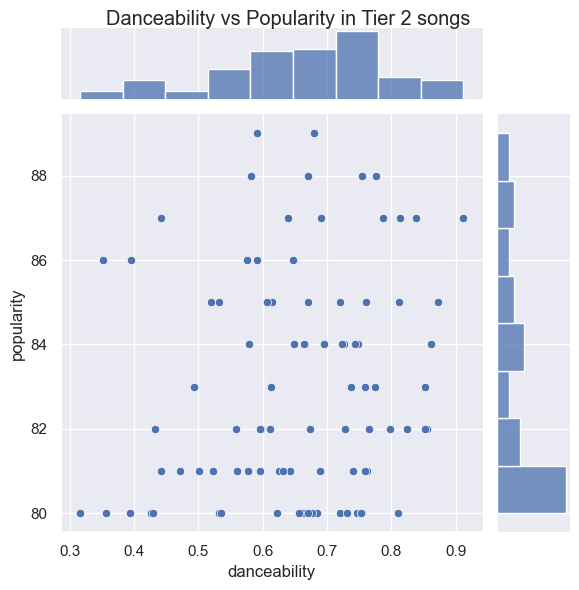

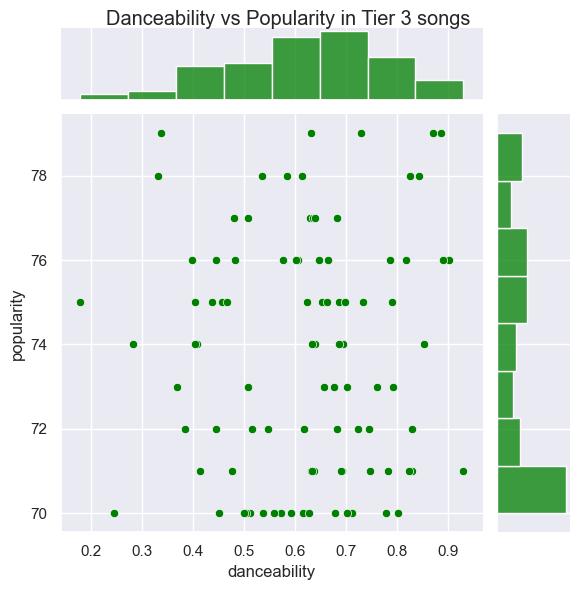

In [86]:
#Tier 1 Plot code
sns.jointplot(data=new_sample, x="danceability", y="popularity", color='red')
plt.suptitle("Danceability vs Popularity in Tier 1 songs")
plt.subplots_adjust(top=0.95)

#Tier 2 Plot code
sns.jointplot(data=tier_2_sample, x="danceability", y="popularity", kind='scatter')
plt.suptitle("Danceability vs Popularity in Tier 2 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(80,90,2))

#Tier 3 Plot code
sns.jointplot(data=tier_3_sample, x="danceability", y="popularity", kind='scatter', color='green')
plt.suptitle("Danceability vs Popularity in Tier 3 songs")
plt.subplots_adjust(top=0.95)
plt.yticks(range(70,80,2))

For this set of visualizations, I chose to seperate the three into their own graphs because I am most interested in the shape of the data. It appears that in all three tiers, some sort of linear relationship exists amongst the two factors.  On the surface, this appears to be nothing more than common sense; who would listen to music that wasn't danceable in some way? I felt as if there was more to explore.

In [82]:
new_sample = pd.concat([tier_1, tier_2_sample, tier_3_sample])

def choose_tier(x: pd.DataFrame) -> int:
    """
    Assigns songs to their appropriate tier
    """
    if x['popularity'] >= 90:
        return 1
    elif x['popularity'] >= 80:
        return 2
    else:
        return 3

new_sample['tier'] = new_sample.apply(lambda x: choose_tier(x), axis=1)
new_sample

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tier
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alt-rock,1
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative,1
15013,3JvKfv6T31zO0ini8iNItO,Tom Odell,Long Way Down (Deluxe),Another Love,93,244360,True,0.445,0.537,4,...,0,0.0400,0.6950,0.000017,0.0944,0.1310,122.769,4,chill,1
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,...,0,0.0427,0.0635,0.000001,0.1050,0.3100,116.992,4,dance,1
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.0130,0.000005,0.2660,0.2380,131.121,4,dance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104801,2mRwodUOATBk5spcUsEidB,Rels B,LA ISLA LP,La Última Canción,73,184748,False,0.793,0.605,1,...,0,0.1190,0.4260,0.000000,0.3340,0.2680,91.068,4,spanish,3
53533,2pPO9YecZimmuVQfIzfV6U,Ofenbach;Lagique,Wasted Love (feat. Lagique),Wasted Love (feat. Lagique),75,139563,False,0.734,0.855,6,...,0,0.1350,0.0821,0.000005,0.0901,0.5400,121.955,4,house,3
20308,0YammaEkYSeo9vQYZ1OwS6,David Guetta;Bebe Rexha;J Balvin,7,Say My Name,73,198946,False,0.703,0.660,10,...,0,0.1230,0.1370,0.000000,0.1920,0.7900,95.031,4,dance,3
71213,0RdUX4WE0fO30VnlUbDVL6,Scorpions,Comeblack,Still Loving You,74,403453,False,0.282,0.605,6,...,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,4,metal,3


I decided to combine the samples, alongside all tier 1 songs, into a singular DataFrame in order to perform analysis on it. I also needed to find a way to differentiate the songs by tier, so I created a new column designating the results. I wanted to combine the data in order to perform a multiple regression plot in which I could easily compare the linearity of the plots. This would give a ballpark idea of how dependent each tier was on the factor in question when it came to determining popularity.

Text(0.5, 1.0, 'Valence vs Popularity Linear Regression for all Tiers')

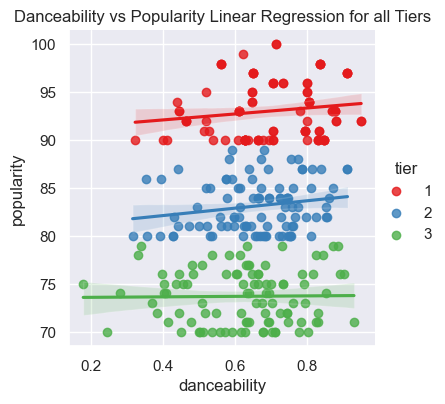

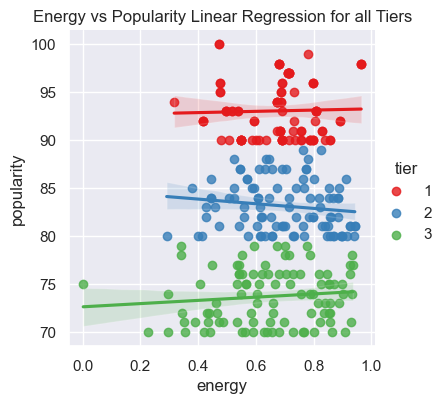

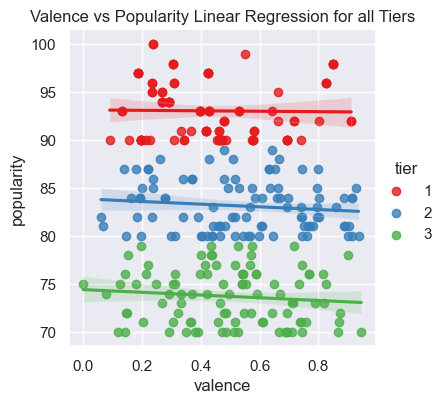

In [87]:
sns.lmplot(
    data=new_sample, x="danceability", y="popularity",
    hue="tier", height=4, palette="Set1"
)
plt.title("Danceability vs Popularity Linear Regression for all Tiers")

sns.lmplot(
    data=new_sample, x="energy", y="popularity",
    hue="tier", height=4, palette="Set1"
)
plt.title("Energy vs Popularity Linear Regression for all Tiers")

sns.lmplot(
    data=new_sample, x="valence", y="popularity",
    hue="tier", height=4, palette="Set1"
)
plt.title("Valence vs Popularity Linear Regression for all Tiers")


I found these results to be especially shocking, considering that my hypothesis was that amongst tier 1 songs, higher energy and danceability would correlate with higher popularity in songs, but this even proved to be the opposite when it came to energy. In general, however, it is reasonable to claim that there is a positive linear correlation between a song's popularity, and its energy and danceability.

## Explicit Music
One other fold that I wanted to explore was the impact of explicity on popular music. I also intend to reapply the filters of danceability and energy between explicit and clean music, as there could be a connection between those as well.